<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_7_Ant_Colony_Optimization_(ACO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archisha Sinha**
##Domain: Evolutionary Computing
##Topic: Ant Colony Optimization

###Aim: Implementation of Ant Colony Optimization(ACO) Algorithms

i. Explore, understand and draw parallels between real ants and artificial ants concept

ii. Implement Ant System Algorithm on Travelling Salesman Problem

iii. Apply Min Max Ant System Algorithm on the above problem

iv. Compare and analyse both the algorithms

##Ant Colony Optimization:
-  Borrows ideas from biological ants
- Ants are able to find shortest path between their colony and source of food
- Shortest path is found using pheromone trails which ants deposit when they travel
-  When ants leave their nest to search for a food

- They follow random path
- When the ant finds the food source, it walks back to the nest leaving “markers” or pheromone that shows that the path has food
- When other ants come across the markers, they are likely to follow that path.
- If they do, then the populate the path with more pheromone.
- Shortest path gets stronger pheromone trail
- An ant is most likely to choose path with pheromone trail which makes it stronger
- Other ants follow stronger path which is the shortest path
- Positive feedback process prompts other ants to follow shorter path

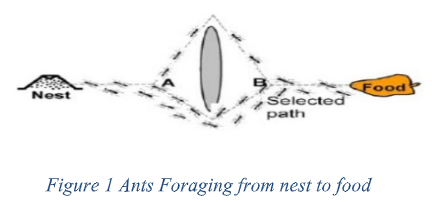

##Ant System Algorithm

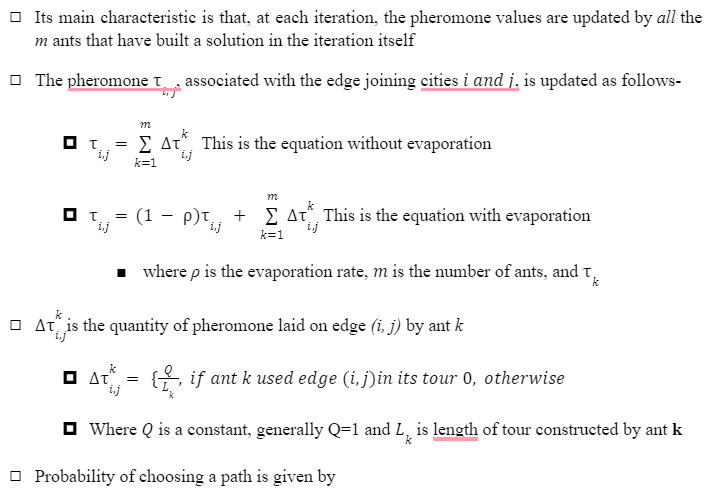

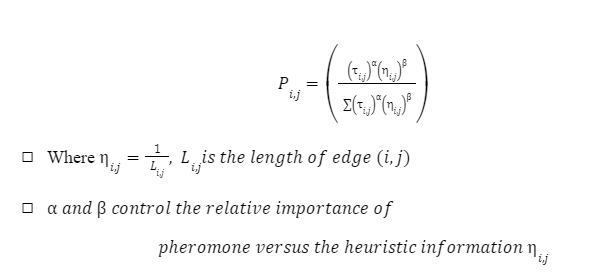

## Max Min Ant System

This algorithm  is an improvement over the original Ant System. Its characterizing elements are that only the best ant updates the pheromone trails and that the value of the pheromone is bound
The pheromone update is implemented as follows:

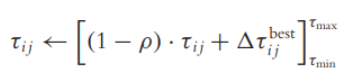

where τmax and τmin are respectively the upper and lower bounds imposed on the pheromone; the operator is defined as
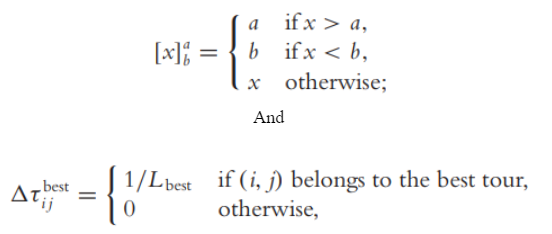


where Lbest is the length of the tour of the best ant.

##Task:
##1. Implement Travelling Salesman Problem for the given distance matrix and initial pheromone level using AS Algorithm

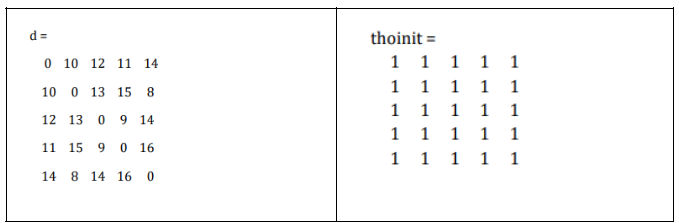

##2. Implement the above problem using Max Min AS Algorithm
##3. Compare the algorithms in terms of time and complexity


In [ ]:
import numpy as np

def ant_system_algorithm(distance_matrix, initial_pheromone, alpha, beta, rho, iterations):
    num_cities = len(distance_matrix)
    pheromone_matrix = np.copy(initial_pheromone)
    best_path = None
    best_length = float('inf')

    for _ in range(iterations):
        ant_tours = []
        tour_lengths = []

        for ant in range(num_cities):
            current_city = ant
            unvisited_cities = set(range(num_cities))
            tour = [current_city]
            tour_length = 0

            while unvisited_cities:
                probabilities = calculate_probabilities(pheromone_matrix, distance_matrix, current_city, unvisited_cities, alpha, beta)
                next_city = np.random.choice(list(unvisited_cities), p=probabilities)
                tour_length += distance_matrix[current_city][next_city]
                tour.append(next_city)
                unvisited_cities.remove(next_city)
                current_city = next_city

            tour_lengths.append(tour_length)
            ant_tours.append(tour)

        update_pheromones(pheromone_matrix, ant_tours, tour_lengths, rho)

        if min(tour_lengths) < best_length:
            best_length = min(tour_lengths)
            best_path = ant_tours[tour_lengths.index(min(tour_lengths))]

    return best_path, best_length

In [ ]:
def calculate_probabilities(pheromone_matrix, distance_matrix, current_city, unvisited_cities, alpha, beta):
    probabilities = []
    total = 0

    for city in unvisited_cities:
        pheromone = pheromone_matrix[current_city][city]
        distance = distance_matrix[current_city][city]
        if distance == 0:
            visibility = 0  # Handle zero distances
        else:
            visibility = 1 / distance

        total += (pheromone ** alpha) * (visibility ** beta)

    for city in unvisited_cities:
        pheromone = pheromone_matrix[current_city][city]
        distance = distance_matrix[current_city][city]
        if distance == 0:
            visibility = 0  # Handle zero distances
        else:
            visibility = 1 / distance

        probability = ((pheromone ** alpha) * (visibility ** beta)) / total
        probabilities.append(probability)

    # Check for NaN values and replace with equal probabilities
    if np.isnan(probabilities).any():
        probabilities = [1 / len(unvisited_cities)] * len(unvisited_cities)

    return probabilities

In [ ]:
def update_pheromones(pheromone_matrix, ant_tours, tour_lengths, rho):
    evaporation = 1 - rho

    for i in range(len(pheromone_matrix)):
        for j in range(len(pheromone_matrix[i])):
            pheromone_matrix[i][j] *= evaporation

    for i, tour in enumerate(ant_tours):
        tour_length = tour_lengths[i]
        for j in range(len(tour) - 1):
            pheromone_matrix[tour[j]][tour[j + 1]] += 1 / tour_length

In [ ]:
distance_matrix = np.array([[0, 10, 12, 11, 14],
                            [10, 0, 13, 15, 18],
                            [12, 13, 0, 9, 14],
                            [11, 15, 9, 0, 16],
                            [14, 8, 14, 16, 0]])

initial_pheromone = np.ones_like(distance_matrix)
alpha = 1.0
beta = 2.0
rho = 0.5
iterations = 100

In [ ]:
best_path, best_length = ant_system_algorithm(distance_matrix, initial_pheromone, alpha, beta, rho, iterations)

<ipython-input-2-cf5fc50a0a71>:23: RuntimeWarning: invalid value encountered in scalar divide
  probability = ((pheromone ** alpha) * (visibility ** beta)) / total


In [ ]:
print("Ant System Algorithm:")
print("Best Path:", best_path)
print("Best Length:", best_length)

Ant System Algorithm:
Best Path: [4, 4, 1, 0, 2, 3]
Best Length: 39
